<a href="https://colab.research.google.com/github/Krishna240517/MLAlgos/blob/main/GradientDescentAlgoUnivariateLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([1.0,2.0])
y = np.array([300.0,500.0])

In [ ]:
# compute the cost function
def compute_cost_function(w,b,x,y):
  cost = 0
  m = x.shape[0]
  for i in range(m):
    f_wb = w * x[i] + b
    cost += (f_wb - y[i]) ** 2
  total_cost = 1 / (2 * m) * cost
  return total_cost


In [ ]:
# compute the derivative
def compute_gradient(w,b,x,y):
  m = x.shape[0]
  dj_dw = 0
  dj_db = 0
  for i in range(m):
    f_wb = w * x[i] +  b
    dj_dw_i = (f_wb - y[i]) * x[i];
    dj_db_i = f_wb - y[i];
    dj_dw += dj_dw_i
    dj_db += dj_db_i
  dj_dw = dj_dw / m
  dj_db = dj_db / m
  return dj_dw,dj_db

In [ ]:
def gradient_descent(w_in, b_in, x, y, alpha, iters):
    w, b = w_in, b_in  # Start with initial params
    prev_cost = compute_cost_vector(w, b, x, y)
    J_history = []
    tolerance = 1e-6

    for i in range(iters):
        dj_dw, dj_db = compute_gradient_vector(w, b, x, y)  # ✅ Use current w, b

        # Update parameters
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Compute new cost
        cost = compute_cost_function(w, b, x, y)
        J_history.append(cost)

        # ✅ Scalar convergence check
        if abs(prev_cost - cost) < tolerance:
            print(f"Converged after {i} iterations")
            break

        prev_cost = cost

    return w, b, J_history


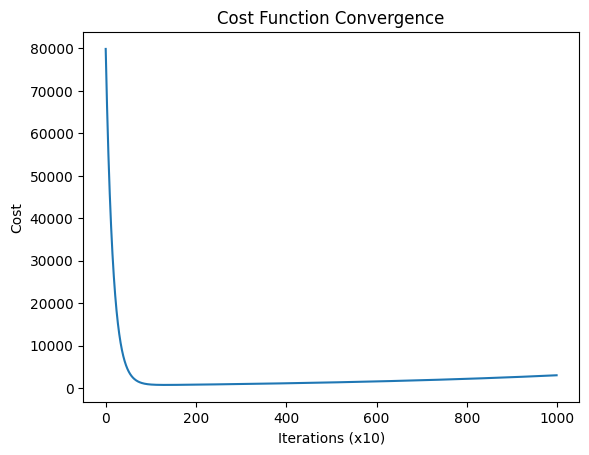

In [ ]:
w_final, b_final, J_history = gradient_descent(0, 0, x, y, 0.01, 1000)

import matplotlib.pyplot as plt
plt.plot(J_history)
plt.xlabel("Iterations (x10)")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.show()

In [ ]:
# vectorized form of each and every function

In [ ]:
# compute_cost_function_vectorized
def compute_cost_vector(w,b,x,y):
  m = x.shape[0]
  return (1 / (2 * m)) * np.sum(((w * x + b) - y) ** 2)

In [ ]:
# compute derivative
def compute_gradient_vector(w,b,x,y):
  m = x.shape[0]
  dj_dw = (1 / m) * np.sum(((w * x + b) - y) * x)
  dj_db = (1 / m) * np.sum((w * x + b) - y)
  return dj_db,dj_dw

In [ ]:
## OOP style


class LinearRegressionUni:
  def __init__(self,alpha=0.01,iters=1000,tolerance = 1e-6):
    self.alpha = alpha
    self.iters = iters
    self.tolerance = tolerance
    self.w = 0
    self.b = 0
    self.J_history = []

  def compute_cost(self,x,y):
    m = x.shape[0]
    preds = self.w * x + self.b
    errors = preds - y
    return np.sum(errors ** 2) / (2 * m)

  def compute_gradient(self,x,y):
    m = x.shape[0]
    preds = self.w * x + self.b
    errors = preds - y
    dj_dw = (1 / m) * np.sum(errors * x)
    dj_db = (1 / m) * np.sum(errors)
    return dj_dw, dj_db

  def fit(self,x,y):
    prev_cost = self.compute_cost(x,y)

    for i in range(self.iters):
      dj_dw, dj_db = self.compute_gradient(x,y)
      self.w -= self.alpha * dj_dw
      self.b -= self.alpha * dj_db

      newCost = self.compute_cost(x,y)
      self.J_history.append(newCost)

      if abs(prev_cost - newCost) < self.tolerance:
        print(f"Converged after {i} iterations")
        break
      prev_cost = newCost
    return self
  def predict(self,x):
    return self.w * x + self.b


In [ ]:

x = np.array([1, 2, 3, 4, 5], dtype=float)
y = np.array([2, 4, 6, 8, 10], dtype=float)


model = LinearRegressionUni()
model.fit(x, y)


x = int(input("Enter a Input to get the predicted output: "))

print(f"Prediction for x:{x} {model.predict(5)}")
print("Learned weight:", model.w)
print("Learned bias:", model.b)


Enter a Input to get the predicted output: 5
Prediction for x:5 9.963527608958529
Learned weight: 1.9737548787242036
Learned bias: 0.09475321533750963
